In [3]:
%pylab inline
def plot_nii(in_file):
    import nibabel as nb
    nii =nb.load(in_file)
    nii.orthoview()

Populating the interactive namespace from numpy and matplotlib


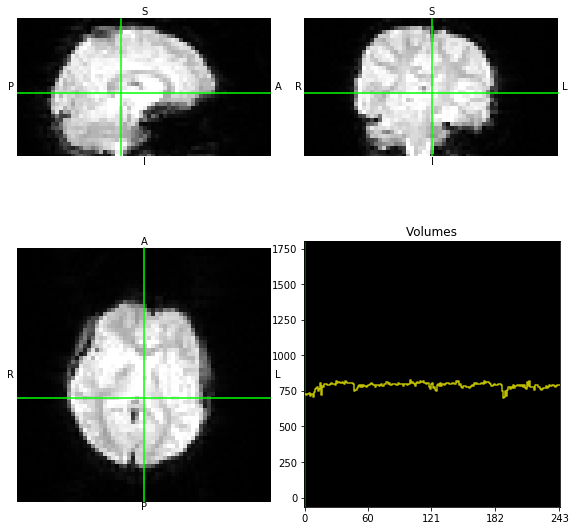

In [4]:
plot_nii('/home/jovyan/work/antsMotionCorr/data/bold.nii.gz')

In [5]:
%%bash
fmri='/home/jovyan/work/antsMotionCorr/data/bold.nii.gz'
out='/home/jovyan/work/antsMotionCorr/data/output/AFFINE'
temp='/home/jovyan/work/antsMotionCorr/data/output/temp'
ref=${out}_avg.nii.gz
antsMotionCorr -d 3 -a $fmri -o $ref
antsMotionCorr  -d 3 -o [${out},${out}.nii.gz,${out}_avg.nii.gz] -m gc[ ${out}_avg.nii.gz , $fmri , 1 , 1 , Random, 0.05  ] -t Affine[ 0.005 ] -i 20 -u 1 -e 1 -s 0 -f 1 -n 10

#antsMotionCorr  -d 3 -o [${out},${out}.nii.gz,${out}_avg.nii.gz] -m gc[ $ref , $fmri , 1 , 1 , Random, 0.05  ] -t Affine[ 0.005 ] -i 20 -u 1 -e 1 -s 0 #-f 1  -m CC[ $ref, $fmri , 1 , 2 ] -t GaussianDisplacementField[0.15,3,0.5] -i 20 -u 1 -e 1 -s 0 -f 1 -n 10

ExtractSliceFromImage 4 ${out}.nii.gz ${temp}.nii.gz 0 32

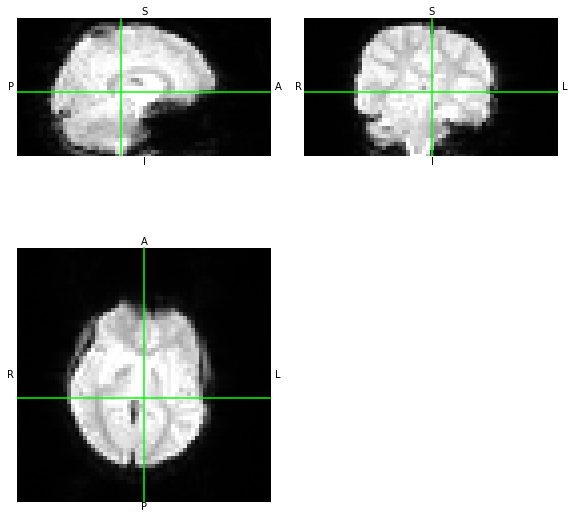

In [6]:
plot_nii('/home/jovyan/work/antsMotionCorr/data/output/AFFINE_avg.nii.gz')

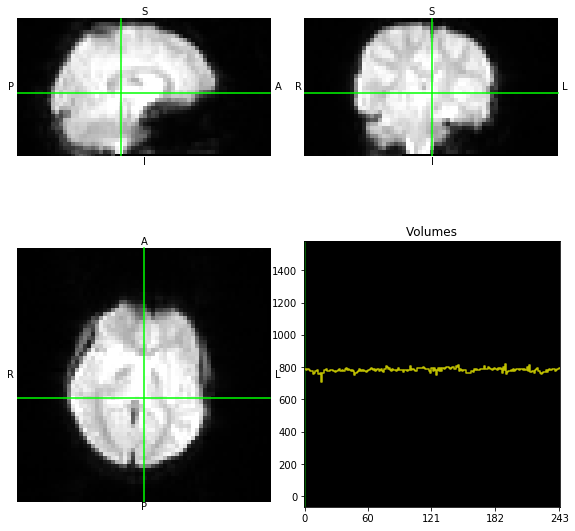

In [7]:
plot_nii('/home/jovyan/work/antsMotionCorr/data/output/AFFINE.nii.gz')

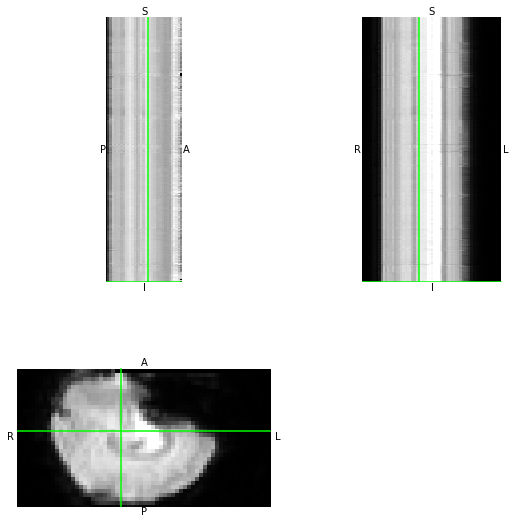

In [8]:
plot_nii('/home/jovyan/work/antsMotionCorr/data/output/temp.nii.gz')

In [12]:
from nipype.interfaces.ants.preprocess import MotionCorr

ants_avg = MotionCorr()
ants_avg.inputs.average_image = '/home/jovyan/work/antsMotionCorr/data/bold.nii.gz'
ants_avg.inputs.output_average_image = '/home/jovyan/work/antsMotionCorr/data/output/avg_out.nii.gz'
ants_avg.cmdline  # doctest: +ALLOW_UNICODE


'antsMotionCorr -d 3 -a /home/jovyan/work/antsMotionCorr/data/bold.nii.gz -o /home/jovyan/work/antsMotionCorr/data/output/avg_out.nii.gz'

In [14]:
result = ants_avg.run()

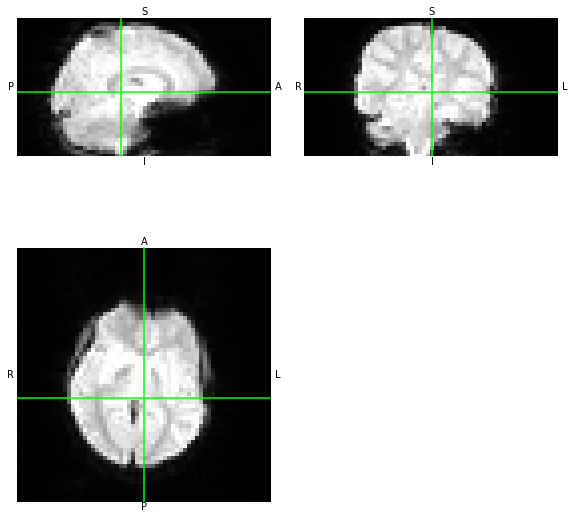

In [16]:
plot_nii('/home/jovyan/work/antsMotionCorr/data/output/avg_out.nii.gz')

In [17]:
from nipype.interfaces.ants.preprocess import MotionCorr
ants_mc = MotionCorr()
ants_mc.inputs.metric_type = 'GC'
ants_mc.inputs.metric_weight = 1
ants_mc.inputs.radius_or_bins = 1
ants_mc.inputs.sampling_strategy = "Random"
ants_mc.inputs.sampling_percentage = 0.05
ants_mc.inputs.iterations = [10,3]
ants_mc.inputs.smoothing_sigmas = [0,0]
ants_mc.inputs.shrink_factors = [1,1]
ants_mc.inputs.n_images = 10
ants_mc.inputs.use_fixed_reference_image = True
ants_mc.inputs.use_scales_estimator = True
ants_mc.inputs.output_average_image = 'wat'
ants_mc.inputs.output_warped_image = '/home/jovyan/work/antsMotionCorr/data/output/warped.nii.gz'
ants_mc.inputs.output_transform_prefix = 'motcorr'
ants_mc.inputs.transformation_model = 'Affine'
ants_mc.inputs.gradient_step_length = 0.005
ants_mc.inputs.fixed_image = "/home/jovyan/work/antsMotionCorr/data/output/avg_out.nii.gz"
ants_mc.inputs.moving_image = "/home/jovyan/work/antsMotionCorr/data/bold.nii.gz"
ants_mc.cmdline  # doctest: +ALLOW_UNICODE

'antsMotionCorr -d 3 -i 10x3 -m GC[/home/jovyan/work/antsMotionCorr/data/output/avg_out.nii.gz,/home/jovyan/work/antsMotionCorr/data/bold.nii.gz,1.0,1,Random,0.05] -n 10 -o [motcorr,/home/jovyan/work/antsMotionCorr/data/output/warped.nii.gz,/home/jovyan/work/antsMotionCorr/data/output/avg_out.nii.gz] -f 1x1 -s 0.0x0.0 -t Affine[0.005] -u 1 -e 1'

In [18]:
result = ants_mc.run()

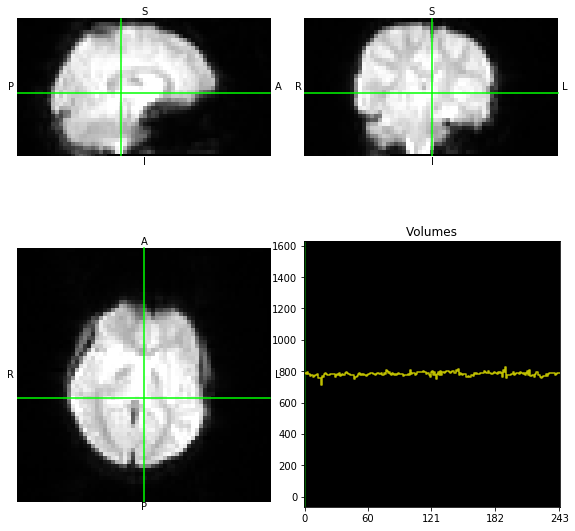

In [19]:
plot_nii('/home/jovyan/work/antsMotionCorr/data/output/warped.nii.gz')

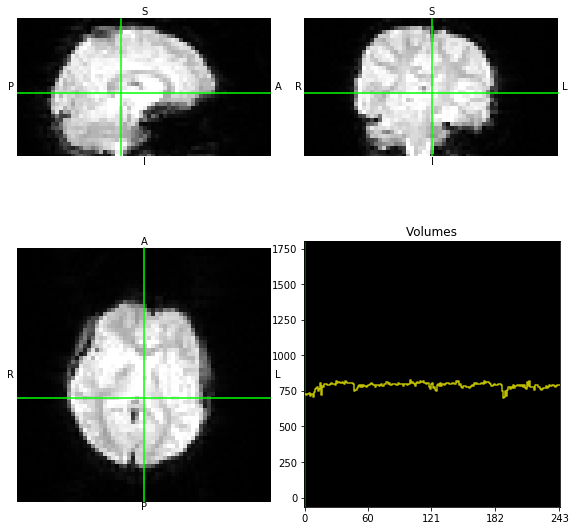

In [20]:
plot_nii('/home/jovyan/work/antsMotionCorr/data/bold.nii.gz')

In [21]:
%%bash
ExtractSliceFromImage 4 /home/jovyan/work/antsMotionCorr/data/output/warped.nii.gz /home/jovyan/work/antsMotionCorr/data/output/temp.nii.gz 0 32
ExtractSliceFromImage 4 /home/jovyan/work/antsMotionCorr/data/bold.nii.gz /home/jovyan/work/antsMotionCorr/data/output/tempO.nii.gz 0 32

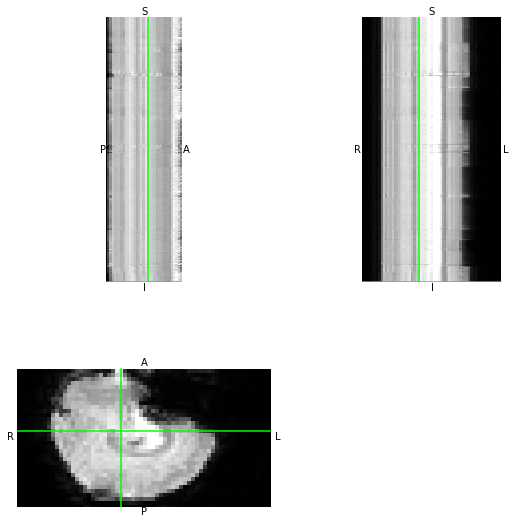

In [22]:
plot_nii('/home/jovyan/work/antsMotionCorr/data/output/tempO.nii.gz')

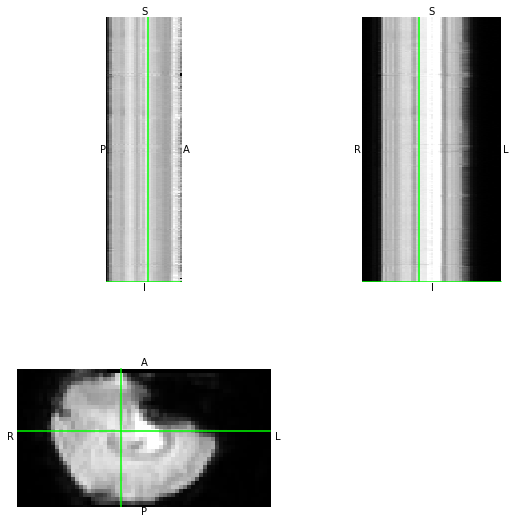

In [23]:
plot_nii('/home/jovyan/work/antsMotionCorr/data/output/temp.nii.gz')